In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima

In [2]:
def dickey_fuller(dataset):
    test = adfuller(dataset, autolag='AIC')
    print("[!] - ADF:", test[0])
    print("[!] - p_value:", test[1])
    print("[*] - State of time-series: ", 'stationary' if test[1] < 0.05 else 'non-stationary')
    print("[!] - Lags:", test[2])

In [3]:
df = pd.read_csv('data/Pecanstreet/participants_data/1hour/features/661_test_30_all_features.csv')

In [4]:
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(df)
data = pd.DataFrame(scaler.transform(df), index=df.index, columns=df.columns)

In [5]:
data

,year,month,day,hour,consumption,generation,dayOfWeek,dayOfYear,maxtempC,mintempC,...,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,prev_consumption,consumption_change
0,-1.0,-1.0,-1.0,-1.0,-0.920815,-1.000000,-1.0,-1.0,-0.866667,-0.878788,...,0.86,-0.242424,-1.0,0.729730,-0.828571,1.000000,-0.955432,0.333333,-1.000000,-0.206805
1,-1.0,-1.0,-1.0,-1.0,-0.709946,-0.999957,-1.0,-1.0,-0.866667,-0.878788,...,0.86,-0.242424,-1.0,0.729730,-0.828571,1.000000,-0.955432,0.333333,-0.920815,-0.063264
2,-1.0,-1.0,-1.0,-1.0,-0.770316,-1.000000,-1.0,-1.0,-0.866667,-0.878788,...,0.86,-0.242424,-1.0,0.729730,-0.828571,1.000000,-0.955432,0.333333,-0.709946,-0.247899
3,-1.0,-1.0,-1.0,-1.0,-0.778424,-1.000000,-1.0,-1.0,-0.866667,-0.878788,...,0.86,-0.242424,-1.0,0.729730,-0.828571,1.000000,-0.955432,0.333333,-0.770316,-0.212324
4,-1.0,-1.0,-1.0,-1.0,-0.824232,-1.000000,-1.0,-1.0,-0.866667,-0.878788,...,0.86,-0.242424,-1.0,0.729730,-0.828571,1.000000,-0.955432,0.333333,-0.778424,-0.237987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,-1.0,1.0,1.0,-1.0,-0.661811,-1.000000,-1.0,1.0,-0.155556,-0.333333,...,1.00,0.878788,-0.5,-0.675676,-0.371429,0.333333,0.376045,-0.555556,-0.469884,-0.337451
8755,-1.0,1.0,1.0,-1.0,-0.699971,-1.000000,-1.0,1.0,-0.155556,-0.333333,...,1.00,0.878788,-0.5,-0.675676,-0.371429,0.333333,0.376045,-0.555556,-0.661811,-0.232781
8756,-1.0,1.0,1.0,-1.0,-0.742917,-1.000000,-1.0,1.0,-0.155556,-0.333333,...,1.00,0.878788,-0.5,-0.675676,-0.371429,0.333333,0.376045,-0.555556,-0.699971,-0.236038
8757,-1.0,1.0,1.0,-1.0,-0.689003,-1.000000,-1.0,1.0,-0.155556,-0.333333,...,1.00,0.878788,-0.5,-0.675676,-0.371429,0.333333,0.376045,-0.555556,-0.742917,-0.170105


In [78]:
data.to_csv('walquiria_norm.csv', index=False)

<AxesSubplot:>

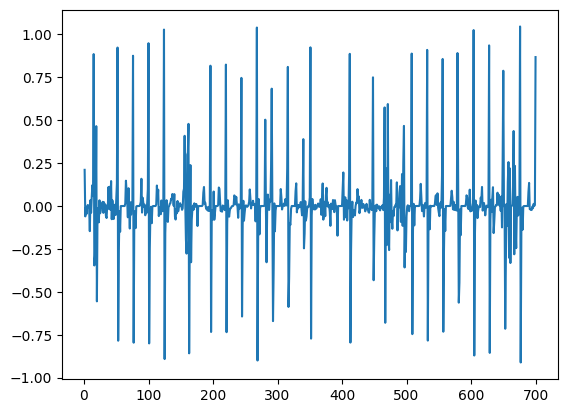

In [26]:
# pegando a diferença da leitura passada, mostra que a série é estacionária. Isso pode ser confirmado pelo teste de dickey-fuller
consumption_data = data.consumption
first_diff_data = consumption_data.diff()[1:]
first_diff_data[:700].plot()

<BarContainer object of 24 artists>

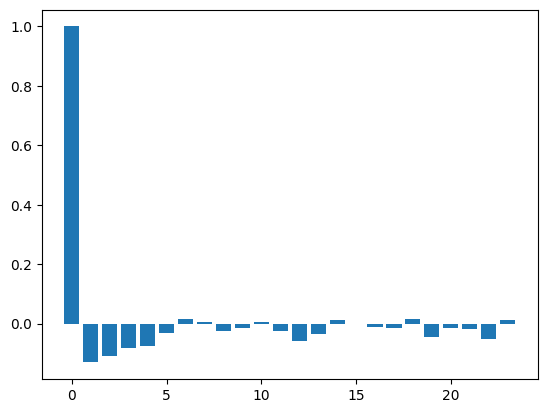

In [40]:
acf_vals = acf(first_diff_data)
plt.bar(np.arange(0, 24), acf_vals[:24])

<BarContainer object of 24 artists>

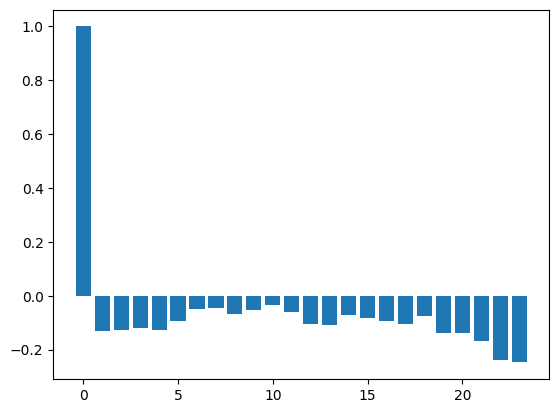

In [43]:
pacf_vals = pacf(first_diff_data)
plt.bar(np.arange(0,24), pacf_vals[:24])

In [58]:
train, test = data.consumption[:int(0.9*len(data))], data.consumption[int(0.9*len(data)):]

In [59]:
dickey_fuller(data.consumption)

[!] - ADF: -5.6919187483872795
[!] - p_value: 8.034651763996948e-07
[*] - State of time-series:  stationary
[!] - Lags: 31


/Users/paulovitorbarbosaramos/opt/anaconda3/envs/consumption-forecasting/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


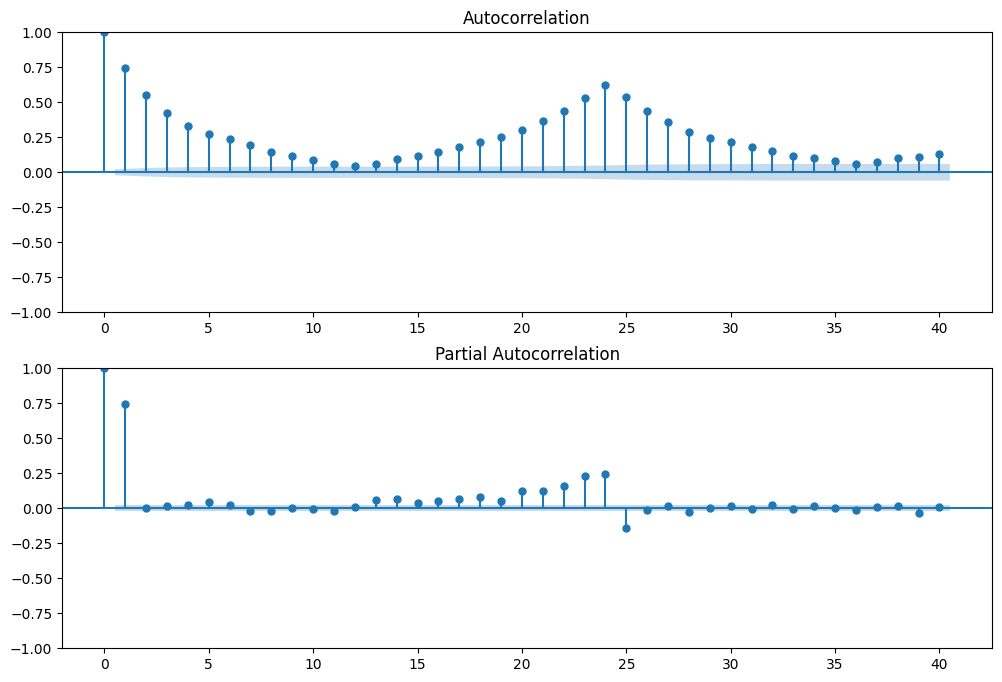

In [60]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = plot_acf(data.consumption, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(data.consumption, lags=40, ax=ax2)

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04122D-02    |proj g|=  7.30642D-02

At iterate    5    f= -1.94670D-02    |proj g|=  1.21021D-01

At iterate   10    f= -2.90513D-02    |proj g|=  1.78797D-01

At iterate   15    f= -5.41921D-02    |proj g|=  4.19230D-02

At iterate   20    f= -5.99991D-02    |proj g|=  1.73167D-03

At iterate   25    f= -6.02269D-02    |proj g|=  1.09466D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     38      1     0     0   

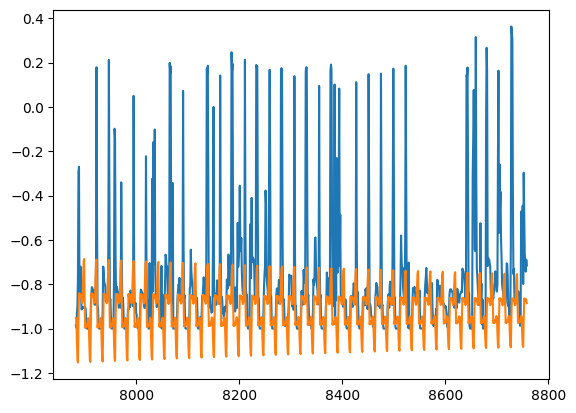

In [73]:
model = SARIMAX(train, order=(0,1,0), seasonal_order=(1,0,1,12))
result = model.fit()
result.summary()
y_preds = result.predict(start=len(train), end=len(train) + len(test) - 1)
plt.plot(test)
plt.plot(y_preds)

In [74]:
test.index

RangeIndex(start=7883, stop=8759, step=1)

In [76]:
rolling = test.copy()
for train_end in test.index:
    train_data = data.consumption[: train_end-1]
    model = SARIMAX(train_data, order=(0,1,0), seasonal_order=(1,0,1,12))
    model_fit = model.fit()
    pred = model_fit.forecast()
    rolling[train_end]=pred

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04746D-02    |proj g|=  7.30678D-02

At iterate    5    f= -1.94171D-02    |proj g|=  1.20248D-01

At iterate   10    f= -2.90251D-02    |proj g|=  1.77268D-01

At iterate   15    f= -5.40362D-02    |proj g|=  4.86896D-02

At iterate   20    f= -5.99344D-02    |proj g|=  1.31424D-02

At iterate   25    f= -6.01642D-02    |proj g|=  6.34942D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     37      1     0     0   

 This problem is unconstrained.



At iterate    5    f= -1.94670D-02    |proj g|=  1.21021D-01

At iterate   10    f= -2.90513D-02    |proj g|=  1.78797D-01

At iterate   15    f= -5.41921D-02    |proj g|=  4.19230D-02

At iterate   20    f= -5.99991D-02    |proj g|=  1.73167D-03

At iterate   25    f= -6.02269D-02    |proj g|=  1.09466D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     38      1     0     0   4.586D-05  -6.023D-02
  F =  -6.0227667881130306E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.



At iterate    5    f= -1.95031D-02    |proj g|=  1.22626D-01

At iterate   10    f= -2.90431D-02    |proj g|=  1.81657D-01

At iterate   15    f= -5.45157D-02    |proj g|=  1.14489D-02

At iterate   20    f= -6.00989D-02    |proj g|=  2.03517D-03

At iterate   25    f= -6.02897D-02    |proj g|=  1.10843D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     48      1     0     0   6.050D-05  -6.029D-02
  F =  -6.0289813420804611E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.02860D-02    |proj g|=  7.30666D-02

At iterate    5    f= -1.95338D-02    |proj g|=  1.24599D-01

At iterate   10    f= -2.90242D-02    |proj g|=  1.85217D-01

At iterate   15    f= -5.48482D-02    |proj g|=  2.37934D-02

At iterate   20    f= -6.02049D-02    |proj g|=  3.31189D-03

At iterate   25    f= -6.03533D-02    |proj g|=  1.13047D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     37      1     0     0   

 This problem is unconstrained.



At iterate    5    f= -1.89712D-02    |proj g|=  1.47411D-01

At iterate   10    f= -2.77223D-02    |proj g|=  2.09281D-01

At iterate   15    f= -5.23278D-02    |proj g|=  7.46343D-02

At iterate   20    f= -6.01034D-02    |proj g|=  3.50645D-03

At iterate   25    f= -6.03823D-02    |proj g|=  4.65301D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     38      1     0     0   4.098D-07  -6.038D-02
  F =  -6.0382530964367132E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.



At iterate    5    f= -1.90109D-02    |proj g|=  1.44960D-01

At iterate   10    f= -2.78447D-02    |proj g|=  2.08026D-01

At iterate   15    f= -5.25815D-02    |proj g|=  5.95766D-02

At iterate   20    f= -6.01466D-02    |proj g|=  1.60057D-02

At iterate   25    f= -6.04282D-02    |proj g|=  1.17068D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     38      1     0     0   4.695D-06  -6.043D-02
  F =  -6.0430702765529636E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.



At iterate    5    f= -1.80790D-02    |proj g|=  1.97688D-01

At iterate   10    f= -2.68110D-02    |proj g|=  2.04114D-01

At iterate   15    f= -5.08851D-02    |proj g|=  5.37530D-02

At iterate   20    f= -5.98464D-02    |proj g|=  5.54256D-02

At iterate   25    f= -6.04656D-02    |proj g|=  3.33303D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     40      1     0     0   1.071D-05  -6.047D-02
  F =  -6.0468954314073203E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03297D-02    |proj g|=  7.44768D-02

At iterate    5    f= -1.01229D-02    |proj g|=  5.27649D-01

At iterate   10    f= -2.74798D-02    |proj g|=  3.45061D-01

At iterate   15    f= -5.44117D-02    |proj g|=  7.82029D-02

At iterate   20    f= -6.01334D-02    |proj g|=  2.07370D-02

At iterate   25    f= -6.04269D-02    |proj g|=  2.30412D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     40      1     0     0   

 This problem is unconstrained.



At iterate    5    f= -2.30508D-02    |proj g|=  7.02801D-02

At iterate   10    f= -5.73610D-02    |proj g|=  3.00471D-02

At iterate   15    f= -6.02063D-02    |proj g|=  2.49778D-03

At iterate   20    f= -6.04765D-02    |proj g|=  1.59772D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     30      1     0     0   6.507D-07  -6.048D-02
  F =  -6.0476512773737452E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f= -7.34419D-03    |proj g|=  6.09650D-01

At iterate   10    f= -2.67862D-02    |proj g|=  1.21279D-01

At iterate   15    f= -5.37695D-02    |proj g|=  5.78466D-02

At iterate   20    f= -5.97043D-02    |proj g|=  6.40879D-03

At iterate   25    f= -6.01475D-02    |proj g|=  7.16398D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     38      1     0     0   2.740D-07  -6.015D-02
  F =  -6.0147638175934610E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.



At iterate    5    f= -7.33961D-03    |proj g|=  6.12299D-01

At iterate   10    f= -2.66545D-02    |proj g|=  1.05543D-01

At iterate   15    f= -5.35895D-02    |proj g|=  7.79684D-02

At iterate   20    f= -5.98364D-02    |proj g|=  1.13924D-03

At iterate   25    f= -6.02104D-02    |proj g|=  1.14379D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     38      1     0     0   3.809D-06  -6.021D-02
  F =  -6.0211080994751975E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04642D-02    |proj g|=  7.46487D-02

At iterate    5    f= -7.20694D-03    |proj g|=  6.18927D-01

At iterate   10    f= -2.64120D-02    |proj g|=  7.29037D-02

At iterate   15    f= -5.48120D-02    |proj g|=  2.22137D-02

At iterate   20    f= -5.99320D-02    |proj g|=  6.80219D-03

At iterate   25    f= -6.02541D-02    |proj g|=  2.40168D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     39      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04172D-02    |proj g|=  7.46823D-02

At iterate    5    f= -6.91694D-03    |proj g|=  6.31254D-01

At iterate   10    f= -2.72361D-02    |proj g|=  1.56233D-01

At iterate   15    f= -5.33956D-02    |proj g|=  6.11584D-02

At iterate   20    f= -6.00626D-02    |proj g|=  4.82635D-02

At iterate   25    f= -6.03014D-02    |proj g|=  6.30766D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     37      1     0     0   

 This problem is unconstrained.



At iterate    5    f= -2.29310D-02    |proj g|=  6.99800D-02

At iterate   10    f= -5.72564D-02    |proj g|=  2.80510D-02

At iterate   15    f= -6.00876D-02    |proj g|=  2.94367D-03

At iterate   20    f= -6.03619D-02    |proj g|=  1.93716D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     30      1     0     0   1.075D-06  -6.036D-02
  F =  -6.0361878524925125E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f= -2.29956D-02    |proj g|=  6.99801D-02

At iterate   10    f= -5.73194D-02    |proj g|=  2.80939D-02

At iterate   15    f= -6.01507D-02    |proj g|=  2.93468D-03

At iterate   20    f= -6.04248D-02    |proj g|=  1.93551D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     30      1     0     0   1.059D-06  -6.042D-02
  F =  -6.0424834372491604E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f= -2.30630D-02    |proj g|=  6.99966D-02

At iterate   10    f= -5.73816D-02    |proj g|=  2.83453D-02

At iterate   15    f= -6.02144D-02    |proj g|=  2.88117D-03

At iterate   20    f= -6.04881D-02    |proj g|=  1.91909D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     30      1     0     0   1.003D-06  -6.049D-02
  F =  -6.0488113430971130E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f= -2.31398D-02    |proj g|=  7.00736D-02

At iterate   10    f= -5.74322D-02    |proj g|=  2.92219D-02

At iterate   15    f= -6.02704D-02    |proj g|=  2.70351D-03

At iterate   20    f= -6.05419D-02    |proj g|=  1.82284D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     30      1     0     0   7.962D-07  -6.054D-02
  F =  -6.0541878442157263E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f= -2.32199D-02    |proj g|=  7.01511D-02

At iterate   10    f= -5.74828D-02    |proj g|=  2.97634D-02

At iterate   15    f= -6.03298D-02    |proj g|=  2.61489D-03

At iterate   20    f= -6.05982D-02    |proj g|=  1.74242D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     30      1     0     0   5.708D-07  -6.060D-02
  F =  -6.0598261700432657E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f= -2.32895D-02    |proj g|=  7.02804D-02

At iterate   10    f= -5.75347D-02    |proj g|=  3.01880D-02

At iterate   15    f= -6.03964D-02    |proj g|=  2.52812D-03

At iterate   20    f= -6.06616D-02    |proj g|=  1.55963D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     30      1     0     0   3.497D-07  -6.066D-02
  F =  -6.0661645566430007E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f= -2.33257D-02    |proj g|=  7.05181D-02

At iterate   10    f= -5.75424D-02    |proj g|=  3.02329D-02

At iterate   15    f= -6.04262D-02    |proj g|=  2.22311D-03

At iterate   20    f= -6.06810D-02    |proj g|=  1.30315D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     30      1     0     0   6.814D-07  -6.068D-02
  F =  -6.0681017595902276E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.92820D-03    |proj g|=  7.54300D-02

At iterate    5    f= -2.33859D-02    |proj g|=  7.04974D-02

At iterate   10    f= -5.75886D-02    |proj g|=  3.02003D-02

At iterate   15    f= -6.04682D-02    |proj g|=  2.30591D-03

At iterate   20    f= -6.07247D-02    |proj g|=  2.49925D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     29      1     0     0   2.499D-06  -6.072D-02
  F =  -6.0724697992476623E-002

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.86947D-03    |proj g|=  7.54396D-02

At iterate    5    f= -2.34235D-02    |proj g|=  7.05961D-02

At iterate   10    f= -5.76401D-02    |proj g|=  3.01587D-02

At iterate   15    f= -6.05353D-02    |proj g|=  2.05934D-03

At iterate   20    f= -6.07856D-02    |proj g|=  1.58930D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     30      1     0     0   7.468D-07  -6.079D-02
  F =  -6.0785621861866854E-002

CONVERG

 This problem is unconstrained.



At iterate    5    f= -2.34843D-02    |proj g|=  7.05853D-02

At iterate   10    f= -5.77015D-02    |proj g|=  3.01893D-02

At iterate   15    f= -6.05944D-02    |proj g|=  2.08613D-03

At iterate   20    f= -6.08457D-02    |proj g|=  1.44053D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     29      1     0     0   9.537D-06  -6.085D-02
  F =  -6.0845678182427240E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f= -2.35466D-02    |proj g|=  7.05847D-02

At iterate   10    f= -5.77642D-02    |proj g|=  3.02086D-02

At iterate   15    f= -6.06573D-02    |proj g|=  2.04806D-03

At iterate   20    f= -6.09082D-02    |proj g|=  1.56919D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     30      1     0     0   7.360D-07  -6.091D-02
  F =  -6.0908206064435935E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.68381D-03    |proj g|=  7.54162D-02

At iterate    5    f= -2.36090D-02    |proj g|=  7.05906D-02

At iterate   10    f= -5.78270D-02    |proj g|=  3.02084D-02

At iterate   15    f= -6.07221D-02    |proj g|=  1.98282D-03

At iterate   20    f= -6.09715D-02    |proj g|=  1.54833D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     30      1     0     0   9.480D-07  -6.097D-02
  F =  -6.0971538815436432E-002

CONVERG

 This problem is unconstrained.



At iterate    5    f= -2.36728D-02    |proj g|=  7.05867D-02

At iterate   10    f= -5.78901D-02    |proj g|=  3.02172D-02

At iterate   15    f= -6.07849D-02    |proj g|=  1.96887D-03

At iterate   20    f= -6.10342D-02    |proj g|=  1.49578D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     30      1     0     0   9.720D-07  -6.103D-02
  F =  -6.1034167239965083E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.55697D-03    |proj g|=  7.54030D-02

At iterate    5    f= -2.37359D-02    |proj g|=  7.05921D-02

At iterate   10    f= -5.79527D-02    |proj g|=  3.02119D-02

At iterate   15    f= -6.08498D-02    |proj g|=  1.88625D-03

At iterate   20    f= -6.10973D-02    |proj g|=  1.20662D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     30      1     0     0   8.709D-05  -6.110D-02
  F =  -6.1097332561075669E-002

CONVERG

 This problem is unconstrained.



At iterate    5    f= -2.37993D-02    |proj g|=  7.05922D-02

At iterate   10    f= -5.80159D-02    |proj g|=  3.02193D-02

At iterate   15    f= -6.09143D-02    |proj g|=  1.81855D-03

At iterate   20    f= -6.11606D-02    |proj g|=  1.54901D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     29      1     0     0   1.207D-05  -6.116D-02
  F =  -6.1160562307562172E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.42883D-03    |proj g|=  7.53289D-02

At iterate    5    f= -2.38645D-02    |proj g|=  7.05517D-02

At iterate   10    f= -5.80751D-02    |proj g|=  3.02679D-02

At iterate   15    f= -6.09623D-02    |proj g|=  2.05669D-03

At iterate   20    f= -6.12141D-02    |proj g|=  1.41023D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     29      1     0     0   9.590D-06  -6.121D-02
  F =  -6.1214136856990092E-002

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.36358D-03    |proj g|=  7.52384D-02

At iterate    5    f= -2.39262D-02    |proj g|=  7.05034D-02

At iterate   10    f= -5.81382D-02    |proj g|=  3.03561D-02

At iterate   15    f= -6.10155D-02    |proj g|=  2.16586D-03

At iterate   20    f= -6.12714D-02    |proj g|=  1.33425D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     30      1     0     0   7.324D-07  -6.127D-02
  F =  -6.1271452651591833E-002

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.29926D-03    |proj g|=  7.51967D-02

At iterate    5    f= -2.39880D-02    |proj g|=  7.04843D-02

At iterate   10    f= -5.82033D-02    |proj g|=  3.03996D-02

At iterate   15    f= -6.10774D-02    |proj g|=  2.17666D-03

At iterate   20    f= -6.13346D-02    |proj g|=  8.47078D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     29      1     0     0   8.471D-06  -6.133D-02
  F =  -6.1334632437640466E-002

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.24418D-03    |proj g|=  7.51312D-02

At iterate    5    f= -2.40564D-02    |proj g|=  7.03862D-02

At iterate   10    f= -5.82728D-02    |proj g|=  3.03428D-02

At iterate   15    f= -6.11293D-02    |proj g|=  2.34157D-03

At iterate   20    f= -6.13904D-02    |proj g|=  9.78394D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     29      1     0     0   9.784D-06  -6.139D-02
  F =  -6.1390359136106631E-002

CONVERG

 This problem is unconstrained.



At iterate    5    f= -2.41293D-02    |proj g|=  7.04068D-02

At iterate   10    f= -5.83275D-02    |proj g|=  3.02542D-02

At iterate   15    f= -6.11879D-02    |proj g|=  2.38551D-03

At iterate   20    f= -6.14475D-02    |proj g|=  1.01255D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     30      1     0     0   4.102D-07  -6.145D-02
  F =  -6.1447476061095220E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.12260D-03    |proj g|=  7.51800D-02

At iterate    5    f= -2.41891D-02    |proj g|=  7.04240D-02

At iterate   10    f= -5.83836D-02    |proj g|=  3.02468D-02

At iterate   15    f= -6.12467D-02    |proj g|=  2.37158D-03

At iterate   20    f= -6.15054D-02    |proj g|=  8.88867D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     29      1     0     0   8.889D-06  -6.151D-02
  F =  -6.1505354758852951E-002

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.05955D-03    |proj g|=  7.51807D-02

At iterate    5    f= -2.42524D-02    |proj g|=  7.04311D-02

At iterate   10    f= -5.84455D-02    |proj g|=  3.02502D-02

At iterate   15    f= -6.13099D-02    |proj g|=  2.35654D-03

At iterate   20    f= -6.15681D-02    |proj g|=  7.85987D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     29      1     0     0   7.860D-06  -6.157D-02
  F =  -6.1568109276537206E-002

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.99649D-03    |proj g|=  7.51783D-02

At iterate    5    f= -2.43157D-02    |proj g|=  7.04352D-02

At iterate   10    f= -5.85081D-02    |proj g|=  3.02510D-02

At iterate   15    f= -6.13735D-02    |proj g|=  2.34700D-03

At iterate   20    f= -6.16313D-02    |proj g|=  7.13456D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     29      1     0     0   7.135D-06  -6.163D-02
  F =  -6.1631314882675502E-002

CONVERG

 This problem is unconstrained.



At iterate    5    f= -2.43791D-02    |proj g|=  7.04430D-02

At iterate   10    f= -5.85633D-02    |proj g|=  2.91938D-02

At iterate   15    f= -6.13761D-02    |proj g|=  4.55194D-03

At iterate   20    f= -6.16946D-02    |proj g|=  3.20875D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     30      1     0     0   2.773D-06  -6.169D-02
  F =  -6.1694573708514534E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f= -2.44421D-02    |proj g|=  7.04547D-02

At iterate   10    f= -5.86328D-02    |proj g|=  3.02607D-02

At iterate   15    f= -6.15014D-02    |proj g|=  2.28821D-03

At iterate   20    f= -6.17578D-02    |proj g|=  2.50785D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     29      1     0     0   2.508D-06  -6.176D-02
  F =  -6.1757800042863069E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.80978D-03    |proj g|=  7.51942D-02

At iterate    5    f= -2.45032D-02    |proj g|=  7.04693D-02

At iterate   10    f= -5.86933D-02    |proj g|=  3.02598D-02

At iterate   15    f= -6.15647D-02    |proj g|=  2.23945D-03

At iterate   20    f= -6.18198D-02    |proj g|=  3.90467D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     29      1     0     0   3.905D-06  -6.182D-02
  F =  -6.1819804723673634E-002

CONVERG

 This problem is unconstrained.



At iterate    5    f= -2.45664D-02    |proj g|=  7.04757D-02

At iterate   10    f= -5.87558D-02    |proj g|=  3.02606D-02

At iterate   15    f= -6.16285D-02    |proj g|=  2.20643D-03

At iterate   20    f= -6.18829D-02    |proj g|=  8.96938D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     29      1     0     0   8.969D-06  -6.188D-02
  F =  -6.1882896590643797E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f= -2.46321D-02    |proj g|=  7.04687D-02

At iterate   10    f= -5.88137D-02    |proj g|=  3.02340D-02

At iterate   15    f= -6.16845D-02    |proj g|=  2.22709D-03

At iterate   20    f= -6.19388D-02    |proj g|=  6.10934D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     29      1     0     0   6.109D-06  -6.194D-02
  F =  -6.1938834184136572E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.64666D-03    |proj g|=  7.51017D-02

At iterate    5    f= -2.46778D-02    |proj g|=  7.03972D-02

At iterate   10    f= -5.88706D-02    |proj g|=  3.02427D-02

At iterate   15    f= -6.17323D-02    |proj g|=  2.37547D-03

At iterate   20    f= -6.19908D-02    |proj g|=  9.58145D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     29      1     0     0   9.581D-06  -6.199D-02
  F =  -6.1990808012362557E-002

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.42672D-03    |proj g|=  7.42153D-02

At iterate    5    f= -9.56946D-03    |proj g|=  5.62568D-01

At iterate   10    f= -2.81255D-02    |proj g|=  1.01935D-01

At iterate   15    f= -5.60394D-02    |proj g|=  2.51066D-02

At iterate   20    f= -6.08599D-02    |proj g|=  5.02034D-02

At iterate   25    f= -6.10753D-02    |proj g|=  4.99193D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     40      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.84695D-03    |proj g|=  7.50763D-02

At iterate    5    f= -2.34722D-02    |proj g|=  7.02282D-02

At iterate   10    f= -5.77174D-02    |proj g|=  3.01408D-02

At iterate   15    f= -6.05832D-02    |proj g|=  2.52218D-03

At iterate   20    f= -6.08380D-02    |proj g|=  1.41961D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     30      1     0     0   1.391D-07  -6.084D-02
  F =  -6.0837968457028581E-002

CONVERG

 This problem is unconstrained.



At iterate    5    f= -2.33687D-02    |proj g|=  7.05741D-02

At iterate   10    f= -5.76534D-02    |proj g|=  2.98579D-02

At iterate   15    f= -6.05796D-02    |proj g|=  1.53968D-02

At iterate   20    f= -6.08075D-02    |proj g|=  2.16743D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     30      1     0     0   4.048D-06  -6.081D-02
  F =  -6.0807508848649071E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.89099D-03    |proj g|=  7.53479D-02

At iterate    5    f= -2.34356D-02    |proj g|=  7.05495D-02

At iterate   10    f= -5.77150D-02    |proj g|=  2.98726D-02

At iterate   15    f= -6.07050D-02    |proj g|=  1.33122D-02

At iterate   20    f= -6.08672D-02    |proj g|=  8.42769D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     31      1     0     0   5.203D-06  -6.087D-02
  F =  -6.0867199925573413E-002

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.83374D-03    |proj g|=  7.53451D-02

At iterate    5    f= -2.34943D-02    |proj g|=  7.05528D-02

At iterate   10    f= -5.77740D-02    |proj g|=  2.98725D-02

At iterate   15    f= -6.07944D-02    |proj g|=  1.38030D-02

At iterate   20    f= -6.09263D-02    |proj g|=  1.37296D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     29      1     0     0   1.129D-04  -6.093D-02
  F =  -6.0926261272514423E-002

CONVERG

 This problem is unconstrained.



At iterate    5    f= -2.35573D-02    |proj g|=  7.05585D-02

At iterate   10    f= -5.78361D-02    |proj g|=  2.98539D-02

At iterate   15    f= -6.08148D-02    |proj g|=  1.90710D-02

At iterate   20    f= -6.09890D-02    |proj g|=  4.97478D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     30      1     0     0   6.221D-06  -6.099D-02
  F =  -6.0989027937898808E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.70798D-03    |proj g|=  7.53520D-02

At iterate    5    f= -2.36197D-02    |proj g|=  7.05723D-02

At iterate   10    f= -5.78978D-02    |proj g|=  2.98039D-02

At iterate   15    f= -6.08342D-02    |proj g|=  1.83401D-02

At iterate   20    f= -6.10522D-02    |proj g|=  2.31634D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     28      1     0     0   2.316D-06  -6.105D-02
  F =  -6.1052174655177253E-002

CONVERG

 This problem is unconstrained.



At iterate    5    f= -2.36829D-02    |proj g|=  7.05750D-02

At iterate   10    f= -5.79601D-02    |proj g|=  2.97916D-02

At iterate   15    f= -6.09768D-02    |proj g|=  1.75777D-02

At iterate   20    f= -6.11146D-02    |proj g|=  1.06727D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     30      1     0     0   4.214D-06  -6.111D-02
  F =  -6.1114684515693685E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.58182D-03    |proj g|=  7.53476D-02

At iterate    5    f= -2.37457D-02    |proj g|=  7.05815D-02

At iterate   10    f= -5.80223D-02    |proj g|=  2.97676D-02

At iterate   15    f= -6.10049D-02    |proj g|=  1.73013D-02

At iterate   20    f= -6.11776D-02    |proj g|=  8.76498D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     31      1     0     0   1.649D-04  -6.118D-02
  F =  -6.1177639020385678E-002

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.51881D-03    |proj g|=  7.53485D-02

At iterate    5    f= -2.38083D-02    |proj g|=  7.05896D-02

At iterate   10    f= -5.80845D-02    |proj g|=  2.97382D-02

At iterate   15    f= -6.10360D-02    |proj g|=  8.20748D-03

At iterate   20    f= -6.12407D-02    |proj g|=  5.77668D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     30      1     0     0   5.892D-06  -6.124D-02
  F =  -6.1240694063645323E-002

CONVERG

 This problem is unconstrained.



At iterate    5    f= -2.38719D-02    |proj g|=  7.05918D-02

At iterate   10    f= -5.81410D-02    |proj g|=  2.97024D-02

At iterate   15    f= -6.10740D-02    |proj g|=  6.47180D-03

At iterate   20    f= -6.12956D-02    |proj g|=  1.67033D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     30      1     0     0   7.365D-07  -6.130D-02
  F =  -6.1295624408656706E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.39295D-03    |proj g|=  7.53523D-02

At iterate    5    f= -2.39338D-02    |proj g|=  7.06032D-02

At iterate   10    f= -5.81975D-02    |proj g|=  2.96266D-02

At iterate   15    f= -6.11138D-02    |proj g|=  4.93956D-03

At iterate   20    f= -6.13527D-02    |proj g|=  2.14224D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     30      1     0     0   2.085D-06  -6.135D-02
  F =  -6.1352691493013638E-002

CONVERG

 This problem is unconstrained.



At iterate    5    f= -2.39092D-02    |proj g|=  7.09589D-02

At iterate   10    f= -5.81959D-02    |proj g|=  2.79366D-02

At iterate   15    f= -6.10073D-02    |proj g|=  2.82357D-03

At iterate   20    f= -6.13971D-02    |proj g|=  1.32538D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     31      1     0     0   5.356D-07  -6.140D-02
  F =  -6.1397083014039955E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f= -2.38541D-02    |proj g|=  7.14285D-02

At iterate   10    f= -5.82252D-02    |proj g|=  2.68349D-02

At iterate   15    f= -6.11918D-02    |proj g|=  4.80740D-03

At iterate   20    f= -6.14602D-02    |proj g|=  3.43570D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     29      1     0     0   4.018D-06  -6.146D-02
  F =  -6.1460173461177194E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.26388D-03    |proj g|=  7.58304D-02

At iterate    5    f= -2.39126D-02    |proj g|=  7.14212D-02

At iterate   10    f= -5.82581D-02    |proj g|=  2.65308D-02

At iterate   15    f= -6.12258D-02    |proj g|=  4.86666D-03

At iterate   20    f= -6.14942D-02    |proj g|=  3.52635D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     32      1     0     0   5.235D-07  -6.149D-02
  F =  -6.1494226808914330E-002

CONVERG

 This problem is unconstrained.



At iterate    5    f= -2.39776D-02    |proj g|=  7.14116D-02

At iterate   10    f= -5.83214D-02    |proj g|=  2.65430D-02

At iterate   15    f= -6.12887D-02    |proj g|=  4.86753D-03

At iterate   20    f= -6.15570D-02    |proj g|=  3.52891D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     29      1     0     0   5.400D-06  -6.156D-02
  F =  -6.1557021791989450E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f= -2.40384D-02    |proj g|=  7.14238D-02

At iterate   10    f= -5.83818D-02    |proj g|=  2.64536D-02

At iterate   15    f= -6.13504D-02    |proj g|=  4.86459D-03

At iterate   20    f= -6.16191D-02    |proj g|=  3.54801D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     29      1     0     0   5.367D-06  -6.162D-02
  F =  -6.1619082993464733E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f= -2.40993D-02    |proj g|=  7.14383D-02

At iterate   10    f= -5.84432D-02    |proj g|=  2.63681D-02

At iterate   15    f= -6.14130D-02    |proj g|=  4.83431D-03

At iterate   20    f= -6.16821D-02    |proj g|=  3.58806D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     29      1     0     0   5.054D-06  -6.168D-02
  F =  -6.1682103602888776E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f= -2.41498D-02    |proj g|=  7.14832D-02

At iterate   10    f= -5.84958D-02    |proj g|=  2.61282D-02

At iterate   15    f= -6.14694D-02    |proj g|=  4.68324D-03

At iterate   20    f= -6.17401D-02    |proj g|=  3.37168D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     29      1     0     0   2.624D-06  -6.174D-02
  F =  -6.1740110053912924E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f= -2.42122D-02    |proj g|=  7.14896D-02

At iterate   10    f= -5.85577D-02    |proj g|=  2.60821D-02

At iterate   15    f= -6.15318D-02    |proj g|=  4.64667D-03

At iterate   20    f= -6.18027D-02    |proj g|=  3.13649D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     29      1     0     0   1.759D-06  -6.180D-02
  F =  -6.1802651918012055E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.89435D-03    |proj g|=  7.58532D-02

At iterate    5    f= -2.42737D-02    |proj g|=  7.15009D-02

At iterate   10    f= -5.86192D-02    |proj g|=  2.60138D-02

At iterate   15    f= -6.15943D-02    |proj g|=  4.60519D-03

At iterate   20    f= -6.18654D-02    |proj g|=  2.56021D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     29      1     0     0   9.361D-08  -6.187D-02
  F =  -6.1865393701699599E-002

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.83141D-03    |proj g|=  7.58527D-02

At iterate    5    f= -2.43359D-02    |proj g|=  7.15078D-02

At iterate   10    f= -5.86812D-02    |proj g|=  2.59703D-02

At iterate   15    f= -6.16571D-02    |proj g|=  4.58528D-03

At iterate   20    f= -6.19283D-02    |proj g|=  2.01495D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     29      1     0     0   2.469D-06  -6.193D-02
  F =  -6.1928255696844708E-002

CONVERG

 This problem is unconstrained.



At iterate    5    f= -2.43993D-02    |proj g|=  7.15098D-02

At iterate   10    f= -5.87412D-02    |proj g|=  2.59345D-02

At iterate   15    f= -6.17162D-02    |proj g|=  4.57269D-03

At iterate   20    f= -6.19871D-02    |proj g|=  1.54935D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     30      1     0     0   1.174D-05  -6.199D-02
  F =  -6.1987078501515608E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.77441D-03    |proj g|=  7.58152D-02

At iterate    5    f= -2.44101D-02    |proj g|=  7.14682D-02

At iterate   10    f= -5.87627D-02    |proj g|=  2.61484D-02

At iterate   15    f= -6.17361D-02    |proj g|=  4.64291D-03

At iterate   20    f= -6.20066D-02    |proj g|=  3.33360D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     29      1     0     0   2.033D-06  -6.201D-02
  F =  -6.2006625291269352E-002

CONVERG

 This problem is unconstrained.



At iterate    5    f= -2.37996D-02    |proj g|=  7.13456D-02

At iterate   10    f= -5.81298D-02    |proj g|=  2.72520D-02

At iterate   15    f= -6.10699D-02    |proj g|=  4.59089D-03

At iterate   20    f= -6.13316D-02    |proj g|=  2.30551D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     29      1     0     0   6.860D-06  -6.133D-02
  F =  -6.1331619705972222E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.73111D-03    |proj g|=  7.57158D-02

At iterate    5    f= -2.35784D-02    |proj g|=  7.08748D-02

At iterate   10    f= -5.80171D-02    |proj g|=  3.00450D-02

At iterate   15    f= -6.08253D-02    |proj g|=  7.50159D-03

At iterate   20    f= -6.11739D-02    |proj g|=  1.13231D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     30      1     0     0   2.578D-06  -6.117D-02
  F =  -6.1173925378796463E-002

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.90189D-03    |proj g|=  7.57450D-02

At iterate    5    f= -2.34477D-02    |proj g|=  7.09037D-02

At iterate   10    f= -5.79310D-02    |proj g|=  3.00659D-02

At iterate   15    f= -6.07568D-02    |proj g|=  7.37009D-03

At iterate   20    f= -6.10932D-02    |proj g|=  8.66632D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     29      1     0     0   8.666D-06  -6.109D-02
  F =  -6.1093218116439973E-002

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.83905D-03    |proj g|=  7.57476D-02

At iterate    5    f= -2.35111D-02    |proj g|=  7.09103D-02

At iterate   10    f= -5.79926D-02    |proj g|=  3.00209D-02

At iterate   15    f= -6.08284D-02    |proj g|=  7.18330D-03

At iterate   20    f= -6.11555D-02    |proj g|=  8.86682D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     29      1     0     0   8.867D-06  -6.116D-02
  F =  -6.1155502275589219E-002

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.78277D-03    |proj g|=  7.57377D-02

At iterate    5    f= -2.35697D-02    |proj g|=  7.09064D-02

At iterate   10    f= -5.80513D-02    |proj g|=  3.00353D-02

At iterate   15    f= -6.08884D-02    |proj g|=  7.15957D-03

At iterate   20    f= -6.12138D-02    |proj g|=  8.94692D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     29      1     0     0   8.947D-06  -6.121D-02
  F =  -6.1213779985157833E-002

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.72248D-03    |proj g|=  7.57218D-02

At iterate    5    f= -2.36316D-02    |proj g|=  7.08953D-02

At iterate   10    f= -5.81117D-02    |proj g|=  3.00680D-02

At iterate   15    f= -6.09414D-02    |proj g|=  7.29721D-03

At iterate   20    f= -6.12731D-02    |proj g|=  8.92821D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     29      1     0     0   8.928D-06  -6.127D-02
  F =  -6.1273126745024768E-002

CONVERG

 This problem is unconstrained.



At iterate    5    f= -2.36944D-02    |proj g|=  7.09016D-02

At iterate   10    f= -5.81739D-02    |proj g|=  3.00335D-02

At iterate   15    f= -6.10141D-02    |proj g|=  7.10818D-03

At iterate   20    f= -6.13361D-02    |proj g|=  9.02188D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     29      1     0     0   9.022D-06  -6.134D-02
  F =  -6.1336051555495187E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f= -2.37572D-02    |proj g|=  7.09069D-02

At iterate   10    f= -5.82358D-02    |proj g|=  2.99977D-02

At iterate   15    f= -6.10926D-02    |proj g|=  6.79304D-03

At iterate   20    f= -6.13985D-02    |proj g|=  8.76464D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     29      1     0     0   8.765D-06  -6.140D-02
  F =  -6.1398475533301938E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.53382D-03    |proj g|=  7.57195D-02

At iterate    5    f= -2.38200D-02    |proj g|=  7.09121D-02

At iterate   10    f= -5.82980D-02    |proj g|=  2.99638D-02

At iterate   15    f= -6.11681D-02    |proj g|=  6.53787D-03

At iterate   20    f= -6.14613D-02    |proj g|=  8.27115D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     29      1     0     0   8.271D-06  -6.146D-02
  F =  -6.1461275720440488E-002

CONVERG

 This problem is unconstrained.



At iterate    5    f= -2.38822D-02    |proj g|=  7.09215D-02

At iterate   10    f= -5.83599D-02    |proj g|=  2.99130D-02

At iterate   15    f= -6.12591D-02    |proj g|=  5.92528D-03

At iterate   20    f= -6.15242D-02    |proj g|=  6.45271D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     29      1     0     0   6.453D-06  -6.152D-02
  F =  -6.1524160157215936E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f= -2.38702D-02    |proj g|=  7.08782D-02

At iterate   10    f= -5.83066D-02    |proj g|=  2.99830D-02

At iterate   15    f= -6.11519D-02    |proj g|=  6.87919D-03

At iterate   20    f= -6.14593D-02    |proj g|=  8.88631D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     29      1     0     0   8.886D-06  -6.146D-02
  F =  -6.1459333274343900E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f= -2.34694D-02    |proj g|=  7.01032D-02

At iterate   10    f= -5.77874D-02    |proj g|=  3.07422D-02

At iterate   15    f= -6.06234D-02    |proj g|=  1.99411D-03

At iterate   20    f= -6.08788D-02    |proj g|=  1.94441D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     29      1     0     0   1.944D-06  -6.088D-02
  F =  -6.0878794930156105E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.80890D-03    |proj g|=  7.44871D-02

At iterate    5    f= -2.34682D-02    |proj g|=  6.99139D-02

At iterate   10    f= -5.78626D-02    |proj g|=  2.87203D-02

At iterate   15    f= -6.06746D-02    |proj g|=  2.58512D-03

At iterate   20    f= -6.09410D-02    |proj g|=  1.74974D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     30      1     0     0   9.863D-07  -6.094D-02
  F =  -6.0941048086638437E-002

CONVERG

 This problem is unconstrained.



At iterate    5    f= -7.47189D-03    |proj g|=  5.55909D-01

At iterate   10    f= -2.65922D-02    |proj g|=  6.87749D-02

At iterate   15    f= -5.34162D-02    |proj g|=  1.25950D-01

At iterate   20    f= -6.00686D-02    |proj g|=  1.44502D-02

At iterate   25    f= -6.03362D-02    |proj g|=  3.04003D-03

At iterate   30    f= -6.03373D-02    |proj g|=  3.70164D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     30     40      1     0     0   3.702D-07  -6.034D-02
  F =  -6.0337340172426729E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00804D-02    |proj g|=  7.27180D-02

At iterate    5    f= -7.76468D-03    |proj g|=  5.24984D-01

At iterate   10    f= -2.64848D-02    |proj g|=  7.34642D-02

At iterate   15    f= -5.24176D-02    |proj g|=  2.12530D-02

At iterate   20    f= -5.96614D-02    |proj g|=  4.53686D-02

At iterate   25    f= -6.02737D-02    |proj g|=  1.68010D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     40      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00202D-02    |proj g|=  7.27344D-02

At iterate    5    f= -7.50117D-03    |proj g|=  5.36837D-01

At iterate   10    f= -2.64361D-02    |proj g|=  6.92560D-02

At iterate   15    f= -5.25044D-02    |proj g|=  7.48329D-02

At iterate   20    f= -5.96807D-02    |proj g|=  3.21338D-02

At iterate   25    f= -6.03322D-02    |proj g|=  2.04395D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     39      1     0     0   

 This problem is unconstrained.



At iterate    5    f= -7.56087D-03    |proj g|=  5.36716D-01

At iterate   10    f= -2.64947D-02    |proj g|=  6.92536D-02

At iterate   15    f= -5.25330D-02    |proj g|=  7.43075D-02

At iterate   20    f= -5.97412D-02    |proj g|=  3.49399D-02

At iterate   25    f= -6.03934D-02    |proj g|=  3.26861D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     40      1     0     0   6.187D-06  -6.039D-02
  F =  -6.0394900351834493E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.89498D-03    |proj g|=  7.27157D-02

At iterate    5    f= -7.59604D-03    |proj g|=  5.37572D-01

At iterate   10    f= -2.65613D-02    |proj g|=  6.93694D-02

At iterate   15    f= -5.28679D-02    |proj g|=  7.67985D-02

At iterate   20    f= -6.01049D-02    |proj g|=  7.64856D-02

At iterate   25    f= -6.04574D-02    |proj g|=  1.77114D-03

At iterate   30    f= -6.04575D-02    |proj g|=  1.64543D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f= -7.50804D-03    |proj g|=  5.43189D-01

At iterate   10    f= -2.65703D-02    |proj g|=  6.84557D-02

At iterate   15    f= -5.13769D-02    |proj g|=  2.19146D-01

At iterate   20    f= -6.00239D-02    |proj g|=  2.92885D-02

At iterate   25    f= -6.05195D-02    |proj g|=  3.26774D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     44      1     0     0   2.219D-06  -6.052D-02
  F =  -6.0520348731873515E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.77512D-03    |proj g|=  7.27321D-02

At iterate    5    f= -7.29684D-03    |proj g|=  5.52982D-01

At iterate   10    f= -2.95719D-02    |proj g|=  1.27875D-01

At iterate   15    f= -5.54133D-02    |proj g|=  6.24338D-02

At iterate   20    f= -6.04283D-02    |proj g|=  3.51448D-02

At iterate   25    f= -6.05797D-02    |proj g|=  1.06685D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     38      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.71255D-03    |proj g|=  7.27422D-02

At iterate    5    f= -7.14225D-03    |proj g|=  5.61009D-01

At iterate   10    f= -2.99632D-02    |proj g|=  3.01848D-01

At iterate   15    f= -5.53668D-02    |proj g|=  4.61395D-03

At iterate   20    f= -6.02599D-02    |proj g|=  3.20844D-03

At iterate   25    f= -6.06427D-02    |proj g|=  5.56866D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     38      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.65002D-03    |proj g|=  7.27440D-02

At iterate    5    f= -2.31971D-02    |proj g|=  6.97123D-02

At iterate   10    f= -5.75396D-02    |proj g|=  3.67026D-03

At iterate   15    f= -6.04335D-02    |proj g|=  5.54304D-03

At iterate   20    f= -6.07055D-02    |proj g|=  6.07180D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     29      1     0     0   6.072D-06  -6.071D-02
  F =  -6.0705471502331715E-002

CONVERG

 This problem is unconstrained.



At iterate    5    f= -2.32815D-02    |proj g|=  6.97172D-02

At iterate   10    f= -5.76098D-02    |proj g|=  5.28406D-03

At iterate   15    f= -6.04948D-02    |proj g|=  5.14724D-03

At iterate   20    f= -6.07633D-02    |proj g|=  1.67634D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     30      1     0     0   4.804D-06  -6.076D-02
  F =  -6.0763334051101271E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f= -2.34319D-02    |proj g|=  6.98235D-02

At iterate   10    f= -5.77145D-02    |proj g|=  1.69575D-02

At iterate   15    f= -6.05680D-02    |proj g|=  3.08426D-03

At iterate   20    f= -6.08217D-02    |proj g|=  2.13048D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     30      1     0     0   8.688D-07  -6.082D-02
  F =  -6.0821718972348247E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.81762D-03    |proj g|=  7.40641D-02

At iterate    5    f= -2.33913D-02    |proj g|=  7.02338D-02

At iterate   10    f= -5.75010D-02    |proj g|=  2.98310D-02

At iterate   15    f= -6.03443D-02    |proj g|=  2.16766D-03

At iterate   20    f= -6.05802D-02    |proj g|=  9.86434D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     29      1     0     0   9.864D-06  -6.058D-02
  F =  -6.0580185746470283E-002

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.90318D-03    |proj g|=  7.38203D-02

At iterate    5    f= -2.33364D-02    |proj g|=  7.03461D-02

At iterate   10    f= -5.75117D-02    |proj g|=  2.97326D-02

At iterate   15    f= -6.03823D-02    |proj g|=  2.26312D-03

At iterate   20    f= -6.06147D-02    |proj g|=  1.10670D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     30      1     0     0   1.601D-07  -6.061D-02
  F =  -6.0614717879185723E-002

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.89688D-03    |proj g|=  7.38438D-02

At iterate    5    f= -2.33745D-02    |proj g|=  7.04080D-02

At iterate   10    f= -5.75564D-02    |proj g|=  2.97261D-02

At iterate   15    f= -6.04388D-02    |proj g|=  2.24825D-03

At iterate   20    f= -6.06677D-02    |proj g|=  7.12456D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     29      1     0     0   7.125D-06  -6.067D-02
  F =  -6.0667661054076866E-002

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.83517D-03    |proj g|=  7.38473D-02

At iterate    5    f= -2.34382D-02    |proj g|=  7.04170D-02

At iterate   10    f= -5.76182D-02    |proj g|=  2.97204D-02

At iterate   15    f= -6.05026D-02    |proj g|=  2.22562D-03

At iterate   20    f= -6.07305D-02    |proj g|=  4.82489D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     29      1     0     0   4.825D-06  -6.073D-02
  F =  -6.0730451825993466E-002

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.77379D-03    |proj g|=  7.38566D-02

At iterate    5    f= -2.35023D-02    |proj g|=  7.04269D-02

At iterate   10    f= -5.76797D-02    |proj g|=  2.97078D-02

At iterate   15    f= -6.05664D-02    |proj g|=  2.19119D-03

At iterate   20    f= -6.07930D-02    |proj g|=  2.83166D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     29      1     0     0   2.832D-06  -6.079D-02
  F =  -6.0793007530178071E-002

CONVERG

 This problem is unconstrained.



At iterate    5    f= -2.35573D-02    |proj g|=  7.04458D-02

At iterate   10    f= -5.77290D-02    |proj g|=  2.96784D-02

At iterate   15    f= -6.06210D-02    |proj g|=  2.06797D-03

At iterate   20    f= -6.08443D-02    |proj g|=  2.32920D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     30      1     0     0   1.926D-07  -6.084D-02
  F =  -6.0844306413030708E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.65911D-03    |proj g|=  7.38823D-02

At iterate    5    f= -2.36216D-02    |proj g|=  7.04547D-02

At iterate   10    f= -5.77905D-02    |proj g|=  2.96477D-02

At iterate   15    f= -6.06859D-02    |proj g|=  1.97516D-03

At iterate   20    f= -6.09068D-02    |proj g|=  1.48883D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     30      1     0     0   4.420D-07  -6.091D-02
  F =  -6.0906794953373443E-002

CONVERG

 This problem is unconstrained.



At iterate    5    f= -2.36845D-02    |proj g|=  7.04501D-02

At iterate   10    f= -5.78531D-02    |proj g|=  2.96581D-02

At iterate   15    f= -6.07476D-02    |proj g|=  1.99570D-03

At iterate   20    f= -6.09690D-02    |proj g|=  1.36309D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     29      1     0     0   9.693D-06  -6.097D-02
  F =  -6.0968979987247929E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.53358D-03    |proj g|=  7.38742D-02

At iterate    5    f= -2.37481D-02    |proj g|=  7.04558D-02

At iterate   10    f= -5.79151D-02    |proj g|=  2.96426D-02

At iterate   15    f= -6.08124D-02    |proj g|=  1.90192D-03

At iterate   20    f= -6.10316D-02    |proj g|=  1.58624D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     30      1     0     0   7.070D-07  -6.103D-02
  F =  -6.1031615795025737E-002

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.47103D-03    |proj g|=  7.38806D-02

At iterate    5    f= -2.38123D-02    |proj g|=  7.04643D-02

At iterate   10    f= -5.79768D-02    |proj g|=  2.96113D-02

At iterate   15    f= -6.08789D-02    |proj g|=  1.72010D-03

At iterate   20    f= -6.10943D-02    |proj g|=  1.38023D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     29      1     0     0   1.356D-05  -6.109D-02
  F =  -6.1094306821049188E-002

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.40839D-03    |proj g|=  7.39018D-02

At iterate    5    f= -2.38801D-02    |proj g|=  7.04655D-02

At iterate   10    f= -5.80364D-02    |proj g|=  2.95368D-02

At iterate   15    f= -6.09398D-02    |proj g|=  1.64192D-03

At iterate   20    f= -6.11528D-02    |proj g|=  8.84200D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     30      1     0     0   5.486D-05  -6.115D-02
  F =  -6.1152756269589964E-002

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.34725D-03    |proj g|=  7.40467D-02

At iterate    5    f= -2.39640D-02    |proj g|=  7.05138D-02

At iterate   10    f= -5.80896D-02    |proj g|=  2.88944D-02

At iterate   15    f= -6.10687D-02    |proj g|=  1.23960D-02

At iterate   20    f= -6.12130D-02    |proj g|=  7.13780D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     31      1     0     0   5.173D-06  -6.121D-02
  F =  -6.1213041056106102E-002

CONVERG

 This problem is unconstrained.



At iterate    5    f= -2.40254D-02    |proj g|=  7.06964D-02

At iterate   10    f= -5.81117D-02    |proj g|=  2.66285D-02

At iterate   15    f= -6.09996D-02    |proj g|=  3.38982D-03

At iterate   20    f= -6.12656D-02    |proj g|=  3.88110D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     29      1     0     0   3.881D-06  -6.127D-02
  F =  -6.1265634111675231E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f= -2.40738D-02    |proj g|=  7.07932D-02

At iterate   10    f= -5.81596D-02    |proj g|=  2.62352D-02

At iterate   15    f= -6.10764D-02    |proj g|=  4.51351D-03

At iterate   20    f= -6.13153D-02    |proj g|=  4.09784D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     29      1     0     0   4.098D-06  -6.132D-02
  F =  -6.1315279500814092E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f= -2.41377D-02    |proj g|=  7.07822D-02

At iterate   10    f= -5.82053D-02    |proj g|=  2.60744D-02

At iterate   15    f= -6.11202D-02    |proj g|=  4.53025D-03

At iterate   20    f= -6.13589D-02    |proj g|=  7.18370D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     29      1     0     0   7.184D-06  -6.136D-02
  F =  -6.1358880198135193E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.11064D-03    |proj g|=  7.43212D-02

At iterate    5    f= -2.42003D-02    |proj g|=  7.07889D-02

At iterate   10    f= -5.82667D-02    |proj g|=  2.60088D-02

At iterate   15    f= -6.11818D-02    |proj g|=  4.52927D-03

At iterate   20    f= -6.14208D-02    |proj g|=  2.30075D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     31      1     0     0   3.474D-08  -6.142D-02
  F =  -6.1420863493449093E-002

CONVERG

 This problem is unconstrained.



At iterate    5    f= -2.42631D-02    |proj g|=  7.07932D-02

At iterate   10    f= -5.83287D-02    |proj g|=  2.59606D-02

At iterate   15    f= -6.12442D-02    |proj g|=  4.53965D-03

At iterate   20    f= -6.14834D-02    |proj g|=  2.08716D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     30      1     0     0   1.518D-06  -6.148D-02
  F =  -6.1483461853245006E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f= -2.43254D-02    |proj g|=  7.07979D-02

At iterate   10    f= -5.83908D-02    |proj g|=  2.59198D-02

At iterate   15    f= -6.13067D-02    |proj g|=  4.55259D-03

At iterate   20    f= -6.15461D-02    |proj g|=  1.53153D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     29      1     0     0   9.705D-06  -6.155D-02
  F =  -6.1546131063785876E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f= -2.43830D-02    |proj g|=  7.07774D-02

At iterate   10    f= -5.84489D-02    |proj g|=  2.60976D-02

At iterate   15    f= -6.13629D-02    |proj g|=  4.51171D-03

At iterate   20    f= -6.16014D-02    |proj g|=  1.75303D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     30      1     0     0   4.312D-06  -6.160D-02
  F =  -6.1601442913487743E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f= -2.44454D-02    |proj g|=  7.07892D-02

At iterate   10    f= -5.85101D-02    |proj g|=  2.59814D-02

At iterate   15    f= -6.14250D-02    |proj g|=  4.53111D-03

At iterate   20    f= -6.16640D-02    |proj g|=  1.59123D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     30      1     0     0   5.528D-07  -6.166D-02
  F =  -6.1664051855036664E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.80325D-03    |proj g|=  7.42974D-02

At iterate    5    f= -2.45078D-02    |proj g|=  7.07974D-02

At iterate   10    f= -5.85718D-02    |proj g|=  2.59034D-02

At iterate   15    f= -6.14873D-02    |proj g|=  4.55907D-03

At iterate   20    f= -6.17267D-02    |proj g|=  1.02008D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     29      1     0     0   6.112D-06  -6.173D-02
  F =  -6.1726712660200543E-002

CONVERG

 This problem is unconstrained.



At iterate    5    f= -2.45702D-02    |proj g|=  7.08043D-02

At iterate   10    f= -5.86335D-02    |proj g|=  2.58404D-02

At iterate   15    f= -6.15495D-02    |proj g|=  4.58318D-03

At iterate   20    f= -6.17891D-02    |proj g|=  6.95709D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     28      1     0     0   6.957D-06  -6.179D-02
  F =  -6.1789134327583928E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.68011D-03    |proj g|=  7.43169D-02

At iterate    5    f= -2.46280D-02    |proj g|=  7.08399D-02

At iterate   10    f= -5.86846D-02    |proj g|=  2.56130D-02

At iterate   15    f= -6.16009D-02    |proj g|=  4.61277D-03

At iterate   20    f= -6.18409D-02    |proj g|=  4.01123D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     28      1     0     0   4.011D-06  -6.184D-02
  F =  -6.1840929532238652E-002

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.61576D-03    |proj g|=  7.42341D-02

At iterate    5    f= -2.46939D-02    |proj g|=  7.07934D-02

At iterate   10    f= -5.87510D-02    |proj g|=  2.60098D-02

At iterate   15    f= -6.16630D-02    |proj g|=  4.51564D-03

At iterate   20    f= -6.19015D-02    |proj g|=  9.52092D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     28      1     0     0   9.521D-06  -6.190D-02
  F =  -6.1901453998929122E-002

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.47058D-03    |proj g|=  7.29986D-02

At iterate    5    f= -2.37077D-02    |proj g|=  6.99820D-02

At iterate   10    f= -5.79845D-02    |proj g|=  1.83439D-02

At iterate   15    f= -6.08045D-02    |proj g|=  2.61396D-03

At iterate   20    f= -6.10542D-02    |proj g|=  1.39003D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     30      1     0     0   1.023D-06  -6.105D-02
  F =  -6.1054226016419376E-002

CONVERG

 This problem is unconstrained.



At iterate    5    f= -2.31011D-02    |proj g|=  6.99425D-02

At iterate   10    f= -5.76050D-02    |proj g|=  6.87326D-03

At iterate   15    f= -6.04741D-02    |proj g|=  4.59303D-03

At iterate   20    f= -6.07446D-02    |proj g|=  3.15331D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     28      1     0     0   3.153D-06  -6.074D-02
  F =  -6.0744591675766506E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.94532D-03    |proj g|=  7.27544D-02

At iterate    5    f= -2.31544D-02    |proj g|=  6.99394D-02

At iterate   10    f= -5.76592D-02    |proj g|=  8.25603D-03

At iterate   15    f= -6.05262D-02    |proj g|=  4.28041D-03

At iterate   20    f= -6.07945D-02    |proj g|=  4.13488D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     29      1     0     0   4.135D-06  -6.079D-02
  F =  -6.0794491454045335E-002

CONVERG

 This problem is unconstrained.



At iterate    5    f= -2.32177D-02    |proj g|=  6.99395D-02

At iterate   10    f= -5.77222D-02    |proj g|=  8.37011D-03

At iterate   15    f= -6.05887D-02    |proj g|=  4.25904D-03

At iterate   20    f= -6.08569D-02    |proj g|=  5.10972D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     29      1     0     0   5.110D-06  -6.086D-02
  F =  -6.0856886317242530E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f= -2.32838D-02    |proj g|=  6.99372D-02

At iterate   10    f= -5.77852D-02    |proj g|=  8.66460D-03

At iterate   15    f= -6.06507D-02    |proj g|=  4.20105D-03

At iterate   20    f= -6.09185D-02    |proj g|=  7.50006D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     29      1     0     0   7.500D-06  -6.092D-02
  F =  -6.0918488730429231E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.76026D-03    |proj g|=  7.27523D-02

At iterate    5    f= -2.33489D-02    |proj g|=  6.99364D-02

At iterate   10    f= -5.78474D-02    |proj g|=  9.04652D-03

At iterate   15    f= -6.07114D-02    |proj g|=  4.13035D-03

At iterate   20    f= -6.09788D-02    |proj g|=  1.00664D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     30      1     0     0   4.226D-06  -6.098D-02
  F =  -6.0978766712797373E-002

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.69790D-03    |proj g|=  7.27588D-02

At iterate    5    f= -2.34173D-02    |proj g|=  6.99367D-02

At iterate   10    f= -5.79123D-02    |proj g|=  9.59537D-03

At iterate   15    f= -6.07746D-02    |proj g|=  4.02169D-03

At iterate   20    f= -6.10413D-02    |proj g|=  1.31991D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     30      1     0     0   2.167D-06  -6.104D-02
  F =  -6.1041288686910229E-002

CONVERG

 This problem is unconstrained.



At iterate    5    f= -2.34720D-02    |proj g|=  6.99359D-02

At iterate   10    f= -5.79683D-02    |proj g|=  9.28445D-03

At iterate   15    f= -6.08376D-02    |proj g|=  1.49835D-03

At iterate   20    f= -6.10982D-02    |proj g|=  7.74238D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     39      1     0     0   2.132D-05  -6.110D-02
  F =  -6.1098191700317439E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.57535D-03    |proj g|=  7.27404D-02

At iterate    5    f= -2.35376D-02    |proj g|=  6.99348D-02

At iterate   10    f= -5.80315D-02    |proj g|=  9.55980D-03

At iterate   15    f= -6.08998D-02    |proj g|=  1.49836D-03

At iterate   20    f= -6.11601D-02    |proj g|=  9.30700D-05



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     59      2     0     0   2.129D-05  -6.116D-02
  F =  -6.1160138620293521E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.51292D-03    |proj g|=  7.27402D-02

At iterate    5    f= -2.36034D-02    |proj g|=  6.99342D-02

At iterate   10    f= -5.80953D-02    |proj g|=  9.85759D-03

At iterate   15    f= -6.09562D-02    |proj g|=  3.96696D-03

At iterate   20    f= -6.12225D-02    |proj g|=  1.44893D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     30      1     0     0   1.699D-06  -6.122D-02
  F =  -6.1222507692672672E-002

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.45044D-03    |proj g|=  7.27338D-02

At iterate    5    f= -2.36664D-02    |proj g|=  6.99335D-02

At iterate   10    f= -5.81569D-02    |proj g|=  9.89208D-03

At iterate   15    f= -6.10166D-02    |proj g|=  3.95043D-03

At iterate   20    f= -6.12826D-02    |proj g|=  1.47050D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     30      1     0     0   1.695D-06  -6.128D-02
  F =  -6.1282558176214981E-002

CONVERG

 This problem is unconstrained.



At iterate    5    f= -2.37239D-02    |proj g|=  6.99277D-02

At iterate   10    f= -5.82113D-02    |proj g|=  9.14994D-03

At iterate   15    f= -6.10720D-02    |proj g|=  4.08194D-03

At iterate   20    f= -6.13385D-02    |proj g|=  1.11463D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     30      1     0     0   3.896D-06  -6.134D-02
  F =  -6.1338497197530789E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f= -2.37817D-02    |proj g|=  7.00319D-02

At iterate   10    f= -5.82515D-02    |proj g|=  1.12380D-02

At iterate   15    f= -6.11259D-02    |proj g|=  3.40522D-03

At iterate   20    f= -6.13872D-02    |proj g|=  2.17419D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     30      1     0     0   1.802D-06  -6.139D-02
  F =  -6.1387195297902535E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.27341D-03    |proj g|=  7.28933D-02

At iterate    5    f= -2.38675D-02    |proj g|=  7.00839D-02

At iterate   10    f= -5.83060D-02    |proj g|=  1.36634D-02

At iterate   15    f= -6.11822D-02    |proj g|=  1.91326D-03

At iterate   20    f= -6.14289D-02    |proj g|=  3.82082D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     30      1     0     0   7.429D-07  -6.143D-02
  F =  -6.1428868718617566E-002

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.21588D-03    |proj g|=  7.29540D-02

At iterate    5    f= -2.39503D-02    |proj g|=  7.00832D-02

At iterate   10    f= -5.83736D-02    |proj g|=  1.50087D-02

At iterate   15    f= -6.12447D-02    |proj g|=  1.70523D-03

At iterate   20    f= -6.14890D-02    |proj g|=  4.17084D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     29      1     0     0   7.076D-06  -6.149D-02
  F =  -6.1488991540156648E-002

CONVERG

 This problem is unconstrained.



At iterate    5    f= -2.40158D-02    |proj g|=  7.00831D-02

At iterate   10    f= -5.84367D-02    |proj g|=  1.52414D-02

At iterate   15    f= -6.13040D-02    |proj g|=  2.00048D-03

At iterate   20    f= -6.15509D-02    |proj g|=  6.15355D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     29      1     0     0   6.154D-06  -6.155D-02
  F =  -6.1550948002960786E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f= -2.40807D-02    |proj g|=  7.00832D-02

At iterate   10    f= -5.84993D-02    |proj g|=  1.55007D-02

At iterate   15    f= -6.13633D-02    |proj g|=  2.25708D-03

At iterate   20    f= -6.16126D-02    |proj g|=  1.43846D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     30      1     0     0   1.185D-06  -6.161D-02
  F =  -6.1612575655268634E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.02885D-03    |proj g|=  7.29587D-02

At iterate    5    f= -2.41483D-02    |proj g|=  7.00839D-02

At iterate   10    f= -5.85633D-02    |proj g|=  1.58927D-02

At iterate   15    f= -6.14239D-02    |proj g|=  2.50245D-03

At iterate   20    f= -6.16750D-02    |proj g|=  1.89251D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     30      1     0     0   1.001D-06  -6.168D-02
  F =  -6.1675044984365567E-002

CONVERG

 This problem is unconstrained.



At iterate    5    f= -2.42154D-02    |proj g|=  7.00846D-02

At iterate   10    f= -5.86272D-02    |proj g|=  1.62843D-02

At iterate   15    f= -6.14855D-02    |proj g|=  2.62735D-03

At iterate   20    f= -6.17375D-02    |proj g|=  2.01376D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     30      1     0     0   9.730D-07  -6.174D-02
  F =  -6.1737512734257712E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.90443D-03    |proj g|=  7.29659D-02

At iterate    5    f= -2.42817D-02    |proj g|=  7.00862D-02

At iterate   10    f= -5.86908D-02    |proj g|=  1.66053D-02

At iterate   15    f= -6.15478D-02    |proj g|=  2.67603D-03

At iterate   20    f= -6.17999D-02    |proj g|=  2.04162D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     30      1     0     0   9.625D-07  -6.180D-02
  F =  -6.1799916865688913E-002

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.84411D-03    |proj g|=  7.29680D-02

At iterate    5    f= -2.43462D-02    |proj g|=  7.00863D-02

At iterate   10    f= -5.87528D-02    |proj g|=  1.69070D-02

At iterate   15    f= -6.16089D-02    |proj g|=  2.69599D-03

At iterate   20    f= -6.18610D-02    |proj g|=  2.04722D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     30      1     0     0   9.484D-07  -6.186D-02
  F =  -6.1860980281229008E-002

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.78175D-03    |proj g|=  7.29645D-02

At iterate    5    f= -2.44100D-02    |proj g|=  7.00855D-02

At iterate   10    f= -5.88154D-02    |proj g|=  1.70034D-02

At iterate   15    f= -6.16711D-02    |proj g|=  2.69841D-03

At iterate   20    f= -6.19231D-02    |proj g|=  2.04561D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     30      1     0     0   9.524D-07  -6.192D-02
  F =  -6.1923120847536303E-002

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.71937D-03    |proj g|=  7.29637D-02

At iterate    5    f= -2.44746D-02    |proj g|=  7.00865D-02

At iterate   10    f= -5.88772D-02    |proj g|=  1.72184D-02

At iterate   15    f= -6.17310D-02    |proj g|=  2.69452D-03

At iterate   20    f= -6.19826D-02    |proj g|=  2.03090D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     30      1     0     0   9.457D-07  -6.198D-02
  F =  -6.1982643684422696E-002

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.65727D-03    |proj g|=  7.29797D-02

At iterate    5    f= -2.45477D-02    |proj g|=  7.00841D-02

At iterate   10    f= -5.89411D-02    |proj g|=  1.77408D-02

At iterate   15    f= -6.17928D-02    |proj g|=  2.67887D-03

At iterate   20    f= -6.20436D-02    |proj g|=  2.00878D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     30      1     0     0   9.049D-07  -6.204D-02
  F =  -6.2043564608099649E-002

CONVERG

 This problem is unconstrained.



At iterate    5    f= -2.41666D-02    |proj g|=  7.00878D-02

At iterate   10    f= -5.86185D-02    |proj g|=  1.33741D-02

At iterate   15    f= -6.14566D-02    |proj g|=  2.62035D-03

At iterate   20    f= -6.17110D-02    |proj g|=  1.54417D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     30      1     0     0   1.636D-06  -6.171D-02
  F =  -6.1710989447941941E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f= -2.39980D-02    |proj g|=  7.00471D-02

At iterate   10    f= -5.85495D-02    |proj g|=  9.10331D-03

At iterate   15    f= -6.13947D-02    |proj g|=  4.48506D-03

At iterate   20    f= -6.16634D-02    |proj g|=  5.90316D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     28      1     0     0   5.903D-06  -6.166D-02
  F =  -6.1663441871062659E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.23418D-03    |proj g|=  7.30880D-02

At iterate    5    f= -2.40484D-02    |proj g|=  7.00424D-02

At iterate   10    f= -5.86097D-02    |proj g|=  9.46083D-03

At iterate   15    f= -6.14529D-02    |proj g|=  4.46463D-03

At iterate   20    f= -6.17214D-02    |proj g|=  1.48690D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     29      1     0     0   1.487D-06  -6.172D-02
  F =  -6.1721386568096337E-002

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.17279D-03    |proj g|=  7.30891D-02

At iterate    5    f= -2.41139D-02    |proj g|=  7.00422D-02

At iterate   10    f= -5.86734D-02    |proj g|=  9.79395D-03

At iterate   15    f= -6.15157D-02    |proj g|=  4.39056D-03

At iterate   20    f= -6.17838D-02    |proj g|=  2.78629D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     29      1     0     0   2.786D-06  -6.178D-02
  F =  -6.1783771784505295E-002

CONVERG

 This problem is unconstrained.



At iterate    5    f= -2.41686D-02    |proj g|=  7.00423D-02

At iterate   10    f= -5.87306D-02    |proj g|=  9.61208D-03

At iterate   15    f= -6.15736D-02    |proj g|=  4.42272D-03

At iterate   20    f= -6.18419D-02    |proj g|=  1.28742D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     29      1     0     0   1.287D-06  -6.184D-02
  F =  -6.1841928259188876E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.05668D-03    |proj g|=  7.30635D-02

At iterate    5    f= -2.42263D-02    |proj g|=  7.00417D-02

At iterate   10    f= -5.87895D-02    |proj g|=  9.41603D-03

At iterate   15    f= -6.16329D-02    |proj g|=  4.46991D-03

At iterate   20    f= -6.19015D-02    |proj g|=  6.58351D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     28      1     0     0   6.584D-06  -6.190D-02
  F =  -6.1901527069941009E-002

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.99444D-03    |proj g|=  7.30679D-02

At iterate    5    f= -2.42941D-02    |proj g|=  7.00409D-02

At iterate   10    f= -5.88538D-02    |proj g|=  9.86225D-03

At iterate   15    f= -6.16958D-02    |proj g|=  4.37052D-03

At iterate   20    f= -6.19639D-02    |proj g|=  3.65767D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     29      1     0     0   3.658D-06  -6.196D-02
  F =  -6.1963931359136304E-002

CONVERG

 This problem is unconstrained.



At iterate    5    f= -2.42890D-02    |proj g|=  7.00294D-02

At iterate   10    f= -5.88294D-02    |proj g|=  1.19720D-02

At iterate   15    f= -6.16679D-02    |proj g|=  3.81489D-03

At iterate   20    f= -6.19329D-02    |proj g|=  1.82068D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     30      1     0     0   2.414D-06  -6.193D-02
  F =  -6.1932890084070345E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.01450D-03    |proj g|=  7.31540D-02

At iterate    5    f= -2.43272D-02    |proj g|=  7.00324D-02

At iterate   10    f= -5.88385D-02    |proj g|=  1.44286D-02

At iterate   15    f= -6.16845D-02    |proj g|=  1.70855D-03

At iterate   20    f= -6.19328D-02    |proj g|=  8.49947D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     28      1     0     0   8.499D-07  -6.193D-02
  F =  -6.1932839612927511E-002

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.95923D-03    |proj g|=  7.31754D-02

At iterate    5    f= -2.43955D-02    |proj g|=  7.00354D-02

At iterate   10    f= -5.88978D-02    |proj g|=  1.54769D-02

At iterate   15    f= -6.17355D-02    |proj g|=  2.18219D-03

At iterate   20    f= -6.19888D-02    |proj g|=  2.19064D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     29      1     0     0   2.191D-06  -6.199D-02
  F =  -6.1988760772571670E-002

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.89692D-03    |proj g|=  7.31739D-02

At iterate    5    f= -2.44600D-02    |proj g|=  7.00357D-02

At iterate   10    f= -5.89595D-02    |proj g|=  1.56609D-02

At iterate   15    f= -6.17932D-02    |proj g|=  2.40532D-03

At iterate   20    f= -6.20483D-02    |proj g|=  1.06858D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     30      1     0     0   1.733D-06  -6.205D-02
  F =  -6.2048327928180866E-002

CONVERG

 This problem is unconstrained.



At iterate    5    f= -2.45261D-02    |proj g|=  7.00362D-02

At iterate   10    f= -5.90222D-02    |proj g|=  1.59435D-02

At iterate   15    f= -6.18523D-02    |proj g|=  2.63933D-03

At iterate   20    f= -6.21093D-02    |proj g|=  1.67863D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     30      1     0     0   1.515D-06  -6.211D-02
  F =  -6.2109302000316578E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f= -2.35480D-02    |proj g|=  7.00833D-02

At iterate   10    f= -5.80087D-02    |proj g|=  1.93320D-02

At iterate   15    f= -6.10926D-02    |proj g|=  7.01076D-03

At iterate   20    f= -6.13835D-02    |proj g|=  6.02244D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     28      1     0     0   6.022D-06  -6.138D-02
  F =  -6.1383475173009801E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.56858D-03    |proj g|=  7.07460D-02

At iterate    5    f= -2.27031D-02    |proj g|=  7.06349D-02

At iterate   10    f= -5.70650D-02    |proj g|=  5.31670D-02

At iterate   15    f= -6.05084D-02    |proj g|=  2.74137D-02

At iterate   20    f= -6.08344D-02    |proj g|=  7.95952D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     29      1     0     0   5.308D-05  -6.083D-02
  F =  -6.0834395711801520E-002

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.96491D-03    |proj g|=  7.12434D-02

At iterate    5    f= -2.26952D-02    |proj g|=  7.01523D-02

At iterate   10    f= -5.70560D-02    |proj g|=  3.12916D-02

At iterate   15    f= -6.02411D-02    |proj g|=  8.47124D-03

At iterate   20    f= -6.05347D-02    |proj g|=  2.53030D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     29      1     0     0   7.704D-06  -6.053D-02
  F =  -6.0534784725372708E-002

CONVERG

 This problem is unconstrained.



At iterate    5    f= -2.26625D-02    |proj g|=  7.01720D-02

At iterate   10    f= -5.70311D-02    |proj g|=  3.35732D-02

At iterate   15    f= -6.02422D-02    |proj g|=  9.08232D-03

At iterate   20    f= -6.05361D-02    |proj g|=  2.32775D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     30      1     0     0   6.374D-08  -6.054D-02
  F =  -6.0536161189230414E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f= -2.26050D-02    |proj g|=  7.01787D-02

At iterate   10    f= -5.69612D-02    |proj g|=  3.45260D-02

At iterate   15    f= -6.01857D-02    |proj g|=  9.28568D-03

At iterate   20    f= -6.04784D-02    |proj g|=  2.15133D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     30      1     0     0   8.542D-07  -6.048D-02
  F =  -6.0478440940672416E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03132D-02    |proj g|=  7.11712D-02

At iterate    5    f= -2.22778D-02    |proj g|=  7.01022D-02

At iterate   10    f= -5.65883D-02    |proj g|=  3.56964D-02

At iterate   15    f= -5.98174D-02    |proj g|=  9.75394D-03

At iterate   20    f= -6.01098D-02    |proj g|=  1.92014D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     30      1     0     0   1.787D-06  -6.011D-02
  F =  -6.0109837400835579E-002

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06724D-02    |proj g|=  7.12633D-02

At iterate    5    f= -2.20341D-02    |proj g|=  6.98989D-02

At iterate   10    f= -5.62858D-02    |proj g|=  2.49167D-02

At iterate   15    f= -5.94022D-02    |proj g|=  7.29824D-03

At iterate   20    f= -5.96922D-02    |proj g|=  2.37267D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     29      1     0     0   3.374D-06  -5.969D-02
  F =  -5.9692228212744051E-002

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06156D-02    |proj g|=  7.12352D-02

At iterate    5    f= -2.20245D-02    |proj g|=  6.99599D-02

At iterate   10    f= -5.62996D-02    |proj g|=  2.89482D-02

At iterate   15    f= -5.94512D-02    |proj g|=  8.11205D-03

At iterate   20    f= -5.97470D-02    |proj g|=  2.62761D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     29      1     0     0   7.630D-06  -5.975D-02
  F =  -5.9747057840072809E-002

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05559D-02    |proj g|=  7.12254D-02

At iterate    5    f= -2.20873D-02    |proj g|=  6.99677D-02

At iterate   10    f= -5.63665D-02    |proj g|=  2.82139D-02

At iterate   15    f= -5.95128D-02    |proj g|=  7.92309D-03

At iterate   20    f= -5.98083D-02    |proj g|=  2.62662D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     29      1     0     0   7.773D-06  -5.981D-02
  F =  -5.9808364746946320E-002

CONVERG

 This problem is unconstrained.



At iterate    5    f= -2.21412D-02    |proj g|=  6.99758D-02

At iterate   10    f= -5.64218D-02    |proj g|=  2.86764D-02

At iterate   15    f= -5.95730D-02    |proj g|=  8.00432D-03

At iterate   20    f= -5.98688D-02    |proj g|=  2.61764D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     29      1     0     0   7.346D-06  -5.987D-02
  F =  -5.9868845532819223E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04329D-02    |proj g|=  7.12061D-02

At iterate    5    f= -2.22074D-02    |proj g|=  6.99711D-02

At iterate   10    f= -5.64876D-02    |proj g|=  2.83211D-02

At iterate   15    f= -5.96347D-02    |proj g|=  7.92203D-03

At iterate   20    f= -5.99299D-02    |proj g|=  2.61694D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     29      1     0     0   7.586D-06  -5.993D-02
  F =  -5.9930005327455127E-002

CONVERG

 This problem is unconstrained.



At iterate    5    f= -2.23086D-02    |proj g|=  6.99319D-02

At iterate   10    f= -5.65786D-02    |proj g|=  2.54594D-02

At iterate   15    f= -5.96984D-02    |proj g|=  7.38854D-03

At iterate   20    f= -5.99906D-02    |proj g|=  2.48395D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     29      1     0     0   5.342D-06  -5.999D-02
  F =  -5.9990650726168084E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f= -2.26043D-02    |proj g|=  6.97692D-02

At iterate   10    f= -5.68037D-02    |proj g|=  4.27505D-03

At iterate   15    f= -5.97893D-02    |proj g|=  6.08995D-03

At iterate   20    f= -6.00418D-02    |proj g|=  1.70938D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     29      1     0     0   4.451D-06  -6.004D-02
  F =  -6.0041849807813658E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f= -2.26857D-02    |proj g|=  6.97791D-02

At iterate   10    f= -5.68577D-02    |proj g|=  3.71543D-03

At iterate   15    f= -5.98424D-02    |proj g|=  3.41811D-03

At iterate   20    f= -6.00660D-02    |proj g|=  2.77335D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     30      1     0     0   1.866D-06  -6.007D-02
  F =  -6.0066044376594449E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.02000D-02    |proj g|=  7.16117D-02

At iterate    5    f= -2.27159D-02    |proj g|=  6.98541D-02

At iterate   10    f= -5.68924D-02    |proj g|=  3.70957D-03

At iterate   15    f= -5.98681D-02    |proj g|=  3.93243D-03

At iterate   20    f= -6.00997D-02    |proj g|=  2.62778D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     30      1     0     0   1.517D-07  -6.010D-02
  F =  -6.0099686475596624E-002

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01391D-02    |proj g|=  7.15603D-02

At iterate    5    f= -2.27528D-02    |proj g|=  6.98850D-02

At iterate   10    f= -5.69429D-02    |proj g|=  3.72139D-03

At iterate   15    f= -5.99484D-02    |proj g|=  2.55825D-03

At iterate   20    f= -6.01589D-02    |proj g|=  1.74064D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     30      1     0     0   1.415D-06  -6.016D-02
  F =  -6.0158900416465572E-002

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00886D-02    |proj g|=  7.14563D-02

At iterate    5    f= -2.27601D-02    |proj g|=  6.99401D-02

At iterate   10    f= -5.69762D-02    |proj g|=  3.74602D-03

At iterate   15    f= -5.99659D-02    |proj g|=  6.06477D-03

At iterate   20    f= -6.02136D-02    |proj g|=  8.70593D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     30      1     0     0   4.680D-06  -6.021D-02
  F =  -6.0213608571579300E-002

CONVERG

 This problem is unconstrained.



At iterate    5    f= -2.27873D-02    |proj g|=  7.00159D-02

At iterate   10    f= -5.70326D-02    |proj g|=  3.75603D-03

At iterate   15    f= -6.00259D-02    |proj g|=  5.94415D-03

At iterate   20    f= -6.02757D-02    |proj g|=  6.56572D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     30      1     0     0   3.740D-06  -6.028D-02
  F =  -6.0275659040020642E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00201D-02    |proj g|=  7.18298D-02

At iterate    5    f= -2.28432D-02    |proj g|=  6.99922D-02


KeyboardInterrupt: 

In [ ]:
residuals = test - rolling